# Prosper Loan Dataset Exploration
## by Manuk Mikayelyan

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) for more detailed information about the dataset's variables.

## Preliminary Wrangling

In [1]:
# Set the working directory
import os

# Fill in the the working directory and remove the '##' symbols from the beginning of below row to make the code work
## os.chdir(r'C:\Users\.............................\Communicate Data Findings Project')
os.getcwd()

'C:\\Users\\manuk\\OneDrive\\Desktop\\MasterSchool_final\\DA_111_EDA\\Communicate Data Findings Project'

In [2]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Set the number of columns and row to be displayed
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [4]:
# Load in the dataset and describe its properties through the questions below.
loan = pd.read_csv('prosperLoanData.csv')

In [5]:
loan.shape

(113937, 81)

### What is the structure of your dataset?

> There are 113937 observations (loan records) in this dataset with 81 variables (features) describing both the borrower information and the loan performance.

### What is/are the main feature(s) of interest in your dataset?

> In the dataset, Loan Status will be the main variable in the analysis. The specific goal of this study is to explore what factors influence the likelihood of a loan defaulting.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The loan status can be theoretically affected by many variables in the database. The analysis, however, will be limited to several variables that are expected to have the greatest impact.

##### Main variable 
- `LoanStatus` - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

##### Explanatory variables
- `Term` - The length of the loan expressed in months.
- `BorrowerAPR` - The Borrower's Annual Percentage Rate (APR) for the loan.
- `ProsperRating (numeric)` - The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
- `ProsperRating (Alpha)` - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- `Occupation` - The Occupation selected by the Borrower at the time they created the listing.
- `EmploymentStatus` - The employment status of the borrower at the time they posted the listing.
- `IncomeRange` - The income range of the borrower at the time the listing was created.  
- `EmploymentStatusDuration` - The length in months of the employment status at the time the listing was created.
- `IsBorrowerHomeowner` - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- `DebtToIncomeRatio` - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- `LoanOriginalAmount` - The origination amount of the loan.
- `ListingCategory (numeric)` - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
- `Recommendations` - Number of recommendations the borrower had at the time the listing was created.

##### Additional variables that will be kept in the database to support the analysis if needed
 - `CreditGrade` - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
 - `LoanNumber` - Unique numeric value associated with the loan.
 - `ListingKey` - Unique key for each listing, same value as the 'key' used in the listing object in the API.
 - `LoanOriginationDate` - The date the loan was originated.
 - `LoanOriginationQuarter` - The quarter in which the loan was originated.

### Data Assessment
> Now that we defined the main features of interest in our dataset let's do some preliminary data wrangling to prepare the dataset for further analysis. The data cleaning mentioned below is not final and may still be required, which we will carry out at later stages if needed.

In [6]:
# Create a sub-dataset keeping only the main features
key_features = ['LoanStatus', 'Term', 'BorrowerAPR', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'Occupation', 
                'EmploymentStatus', 'IncomeRange', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 
                'LoanOriginalAmount', 'ListingCategory (numeric)', 'Recommendations', 'CreditGrade', 'LoanNumber',
                'ListingKey', 'LoanOriginationDate', 'LoanOriginationQuarter', 'Recommendations']

sub_loan = loan[key_features]

In [7]:
# Visually assess the sample of observations from the dataset
sub_loan.sample(10)

,LoanStatus,Term,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),Occupation,EmploymentStatus,IncomeRange,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,LoanOriginalAmount,ListingCategory (numeric),Recommendations,CreditGrade,LoanNumber,ListingKey,LoanOriginationDate,LoanOriginationQuarter,Recommendations
52598,Current,60,0.17522,5.0,B,Skilled Labor,Employed,"$50,000-74,999",243.0,True,0.27,22200,3,0,NaN,85053,1EEE3570213186271ED06D6,2013-02-15 00:00:00,Q1 2013,0
31846,Completed,36,0.20200,5.0,B,Other,Employed,"$25,000-49,999",146.0,False,0.08,7500,7,0,NaN,53320,3C313523579728054BF5D6D,2011-09-15 00:00:00,Q3 2011,0
18401,Current,36,0.23530,4.0,C,Professional,Employed,"$100,000+",80.0,True,NaN,7500,3,0,NaN,96288,880735853647420524339CC,2013-07-24 00:00:00,Q3 2013,0
74816,Chargedoff,36,0.21882,NaN,NaN,Retail Management,Full-time,"$25,000-49,999",13.0,False,0.36,7500,3,0,C,36722,768F3429964748897A4117F,2008-09-16 00:00:00,Q3 2008,0
92622,Completed,36,0.13425,NaN,NaN,Other,Not employed,Not employed,270.0,False,1.96,1500,5,0,AA,24168,97403407997919111C4A572,2007-12-28 00:00:00,Q4 2007,0
40843,Current,36,0.14857,6.0,A,Analyst,Employed,"$100,000+",68.0,True,0.19,35000,1,0,NaN,97267,B58A3583557864500822110,2013-07-29 00:00:00,Q3 2013,0
108825,Chargedoff,36,0.18842,NaN,NaN,Other,Full-time,"$25,000-49,999",12.0,False,0.32,4000,6,0,C,37035,EA303432846653861986B5C,2008-09-25 00:00:00,Q3 2008,0
73827,Defaulted,36,0.29776,NaN,NaN,Skilled Labor,Full-time,"$100,000+",225.0,True,0.39,15000,0,0,C,20786,FF713401636095856F47F39,2007-10-15 00:00:00,Q4 2007,0
33678,Current,60,0.14658,6.0,A,Analyst,Employed,"$75,000-99,999",11.0,True,0.26,9500,1,0,NaN,129318,2FD036017011765777174F5,2014-01-31 00:00:00,Q1 2014,0
54721,Current,36,0.23438,4.0,C,Other,Employed,"$50,000-74,999",138.0,True,0.13,10000,1,0,NaN,129574,746C35985630228603B193B,2014-01-28 00:00:00,Q1 2014,0


In [8]:
# Check for duplicate rows
duplicates = sub_loan.duplicated().sum()
print('There are {} duplicate observations in the dataset'.format(duplicates))

There are 871 duplicate observations in the dataset


In [9]:
# Check for duplicate loans
sub_loan.LoanNumber.duplicated().sum()

871

In [10]:
# Check for duplicate borrowers
sub_loan.ListingKey.duplicated().sum()

871

In [11]:
# Check for the duplicated columns
duplicate_cols = sub_loan.columns[sub_loan.columns.duplicated()]
duplicate_cols

Index(['Recommendations'], dtype='object')

In [12]:
# View the variables 
sub_loan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   BorrowerAPR                113912 non-null  float64
 3   ProsperRating (numeric)    84853 non-null   float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   Occupation                 110349 non-null  object 
 6   EmploymentStatus           111682 non-null  object 
 7   IncomeRange                113937 non-null  object 
 8   EmploymentStatusDuration   106312 non-null  float64
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  DebtToIncomeRatio          105383 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  Recommendations            11

In [13]:
# View the disctiptive statistics
sub_loan.describe()

,Term,BorrowerAPR,ProsperRating (numeric),EmploymentStatusDuration,DebtToIncomeRatio,LoanOriginalAmount,ListingCategory (numeric),Recommendations,LoanNumber,Recommendations
count,113937.000000,113912.000000,84853.000000,106312.000000,105383.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,4.072243,96.071582,0.275947,8337.01385,2.774209,0.048027,69444.474271,0.048027
std,10.436212,0.080364,1.673227,94.480605,0.551759,6245.80058,3.996797,0.332353,38930.479610,0.332353
min,12.000000,0.006530,1.000000,0.000000,0.000000,1000.00000,0.000000,0.000000,1.000000,0.000000
25%,36.000000,0.156290,3.000000,26.000000,0.140000,4000.00000,1.000000,0.000000,37332.000000,0.000000
50%,36.000000,0.209760,4.000000,67.000000,0.220000,6500.00000,1.000000,0.000000,68599.000000,0.000000
75%,36.000000,0.283810,5.000000,137.000000,0.320000,12000.00000,3.000000,0.000000,101901.000000,0.000000
max,60.000000,0.512290,7.000000,755.000000,10.010000,35000.00000,20.000000,39.000000,136486.000000,39.000000


In [14]:
# Check the unique values for the ProsperRating (Alpha) and CreditGrade variables
print(sub_loan['ProsperRating (Alpha)'].value_counts())
print(sub_loan['CreditGrade'].value_counts())

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64
C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64


#### Assessment Summary
Based on the visual and programmatic evaluations, the following steps need to be taken:

1. `ProsperRating (numeric)`, `ListingCategory (numeric)` and `ProsperRating (Alpha)` column names should be changed to facilitate the work.
2. There are 871 duplicate records in the dataset.
3. `LoanOriginationDate` variable type should be changed to a datetime object.
4. `ListingCategory (numeric)` variable type could be changed to pandas object to better reflect the reasons for the loan based on the information of the data dictionary.
5. `ProsperRating`, `IncomeRange` and `CreditGrade` columns contains null values. This is becouse the first two columns reflect the information for loans originated after July 2009 and the lats one - reflects the information for loans originated before 2009. A new column could be created merging those variables.  
6. The `BorrowerAPR`, `Occupation`, `DebtToIncomeRatio`, `EmploymentStatus`, `EmploymentStatusDuration` columns also contain null values.
7. `ProsperRating` and `IncomeRange` variables should be converted to ordinal categorical ones.
8. **Not employed** category of the `IncomeRange` variable can be replaced with **'0$'**.
9. There are duplicated `Recommendations` coulmns - one of them should be droped out. 

### Data Cleaning
> Now we will creat a copy of the original dataframe and address the points identified in data cleaning assessment stage

In [15]:
# Creating a copy of the original dataframe
sub_loan_clean = sub_loan.copy()

In [16]:
# Drop the duplicate records from the dataframe
sub_loan_clean = sub_loan_clean.drop_duplicates()

# Check the resluts
assert not sub_loan_clean.duplicated().any()

In [17]:
# Changing ListingCategory (numeric) and ProsperRating (Alpha) column names
sub_loan_clean = sub_loan_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 
                                                  'ProsperRating (Alpha)': 'ProsperRatingCat',
                                                 'ProsperRating (numeric)':'ProsperRatingNum'})

# Check the resluts
for col_name in ['ListingCategory', 'ProsperRatingCat','ProsperRatingNum']:
    assert col_name in sub_loan_clean.columns


In [18]:
# Map the ListingCategory column to the right category titles
category_lisitng = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

sub_loan_clean.ListingCategory = sub_loan_clean.ListingCategory.map(category_lisitng)

# Check the results
sub_loan_clean.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [19]:
# Create a new column ProsperRating merging ProsperRatingCat and CreditGrade columns. Thus we will not be forced to drop too  
# many observations due to missing data
sub_loan_clean['ProsperRating'] = sub_loan_clean['ProsperRatingCat']
sub_loan_clean['ProsperRating'] = np.where(
                                    ((sub_loan_clean['ProsperRatingCat'].isnull()) & (sub_loan_clean['CreditGrade'].notnull())),
                                    sub_loan_clean['CreditGrade'],
                                    sub_loan_clean['ProsperRatingCat']
                                )
# Check the resluts
sub_loan_clean[['ProsperRatingCat','CreditGrade','ProsperRating']].sample(10)

,ProsperRatingCat,CreditGrade,ProsperRating
37586,C,NaN,C
68529,NaN,AA,AA
86096,C,NaN,C
8163,C,NaN,C
5370,NaN,HR,HR
47734,B,NaN,B
108912,B,NaN,B
43342,B,NaN,B
24233,NaN,D,D
91967,NaN,HR,HR


In [20]:
# ProsperRating column incorporates the information of the columns ProsperRatingCat,CreditGrade, and ProsperRatingNum, so we 
# are going to drop them
sub_loan_clean.drop(['ProsperRatingCat','CreditGrade','ProsperRatingNum'],axis = 1, inplace=True)

# Check the resluts
list(sub_loan_clean.columns.values)

['LoanStatus',
 'Term',
 'BorrowerAPR',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'DebtToIncomeRatio',
 'LoanOriginalAmount',
 'ListingCategory',
 'Recommendations',
 'LoanNumber',
 'ListingKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'Recommendations',
 'ProsperRating']

In [21]:
# Convert LoanOriginationDate to DateTime object
sub_loan_clean.LoanOriginationDate = pd.to_datetime(sub_loan_clean.LoanOriginationDate)

# Check the resluts
sub_loan_clean.LoanOriginationDate.info()

<class 'pandas.core.series.Series'>
Int64Index: 113066 entries, 0 to 113936
Series name: LoanOriginationDate
Non-Null Count   Dtype         
--------------   -----         
113066 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


In [22]:
# Convert ProsperRating and IncomeRange columns to ordered categorical types
# Check the unique values
print(sub_loan_clean.ProsperRating.unique())
print(sub_loan_clean.IncomeRange.unique())

['C' 'A' 'HR' 'D' 'B' 'E' 'AA' nan 'NC']
['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']


In [23]:
# Replace 'Not employed' entries in IncomeRange with $0
sub_loan_clean.IncomeRange = sub_loan_clean.IncomeRange.str.replace('Not employed', '$0')

# Check the resluts
print(sub_loan_clean.IncomeRange.unique())

['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' '$0']


In [24]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    sub_loan_clean[key] = sub_loan_clean[key].astype(correct_order)

# Check the resluts
sub_loan_clean[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

In [25]:
# See number of null values on each columns
sub_loan_clean.isnull().sum()

LoanStatus                     0
Term                           0
BorrowerAPR                   25
Occupation                  3529
EmploymentStatus            2255
IncomeRange                 7741
EmploymentStatusDuration    7625
IsBorrowerHomeowner            0
DebtToIncomeRatio           8472
LoanOriginalAmount             0
ListingCategory                0
Recommendations                0
LoanNumber                     0
ListingKey                     0
LoanOriginationDate            0
LoanOriginationQuarter         0
Recommendations                0
ProsperRating                272
dtype: int64

In [26]:
# Calculate the total proportion of null values in the dataframe
sub_loan_clean.isnull().sum() / sub_loan_clean.shape[0]

LoanStatus                  0.000000
Term                        0.000000
BorrowerAPR                 0.000221
Occupation                  0.031212
EmploymentStatus            0.019944
IncomeRange                 0.068464
EmploymentStatusDuration    0.067438
IsBorrowerHomeowner         0.000000
DebtToIncomeRatio           0.074930
LoanOriginalAmount          0.000000
ListingCategory             0.000000
Recommendations             0.000000
LoanNumber                  0.000000
ListingKey                  0.000000
LoanOriginationDate         0.000000
LoanOriginationQuarter      0.000000
Recommendations             0.000000
ProsperRating               0.002406
dtype: float64

In [27]:
# As per the variable, the proportion of null values is not so high so we are going to drop all the null values from the dataset
sub_loan_clean = sub_loan_clean.dropna()

# Check the result 
sub_loan_clean.isnull().sum()

LoanStatus                  0
Term                        0
BorrowerAPR                 0
Occupation                  0
EmploymentStatus            0
IncomeRange                 0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
DebtToIncomeRatio           0
LoanOriginalAmount          0
ListingCategory             0
Recommendations             0
LoanNumber                  0
ListingKey                  0
LoanOriginationDate         0
LoanOriginationQuarter      0
Recommendations             0
ProsperRating               0
dtype: int64

In [28]:
# Drop out Recommendations duplicated column
sub_loan_clean = sub_loan_clean.loc[:,~sub_loan_clean.T.duplicated(keep='last')]

# Check the result
sub_loan_clean.head(2)

,LoanStatus,Term,BorrowerAPR,Occupation,EmploymentStatus,IncomeRange,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,LoanOriginalAmount,ListingCategory,LoanNumber,ListingKey,LoanOriginationDate,LoanOriginationQuarter,Recommendations,ProsperRating
0,Completed,36,0.16516,Other,Self-employed,"$25,000-49,999",2.0,True,0.17,9425,Not Available,19141,1021339766868145413AB3B,2007-09-12,Q3 2007,0,C
1,Current,36,0.12016,Professional,Employed,"$50,000-74,999",44.0,False,0.18,10000,Home Improvement,134815,10273602499503308B223C1,2014-03-03,Q1 2014,0,A


## Univariate Exploration
> In this section, we will investigate the main variable of interest 'Loan Status' and other features that are expected to have the most influence on it. We will explore our data step by step building univariate, bivariate and multivariate visualizations. The "Question-Visualization-Observations" framework  will be used throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.**

### LoanStatus
#### `Question` 
- How the overall loan portfolio distributed among LoanStatus categories?

In [29]:
# View the categories of the LoanStatus variable
sub_loan_clean.LoanStatus.value_counts()

Current                   50462
Completed                 30644
Chargedoff                 9394
Defaulted                  3051
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Cancelled                     1
Name: LoanStatus, dtype: int64

#### `Visualization` 
- There are a lot of Past Due categories - we will merge them under one category

In [30]:
# Merge Past Due loans 
sub_loan_clean.loc[sub_loan_clean['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'

In [31]:
# Set dtype of 'LoanStatus' to category
loanstatus_order = sub_loan_clean['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
sub_loan_clean['LoanStatus'] = sub_loan_clean['LoanStatus'].astype(ordered_var)

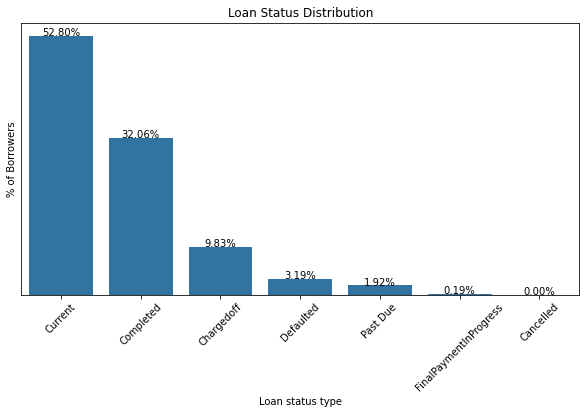

In [32]:
# Print the proportion below the bars 
plt.figure(figsize=[10, 5])

n_loans=sub_loan_clean['LoanStatus'].value_counts().sum()
status_count=sub_loan_clean['LoanStatus'].value_counts()
status_order=status_count.index

base_color = sb.color_palette()[0]
sb.countplot(data=sub_loan_clean, x='LoanStatus', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_loans)

    # print the annotation just below the top of the bar
    
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.ylabel('% of Borrowers')
    plt.yticks([])
    plt.xlabel('Loan status type')
    plt.title('Loan Status Distribution');

#### `Observations`
- The vast majority of lones belong to `Current` category (over 52% of records). `Completed` loans also have a notable share (32% of records) followed by `Charged off` (about 10%), `Defaulted` (3%) and `Past Due` (2%) categories. There is only one record belonging to `Canceled` category.

### Term
#### `Question` 
- What loan terms are most commonly requested by borrowers?

In [33]:
# View the categories of the Term variable
sub_loan_clean.Term.value_counts()

36    71555
60    22603
12     1414
Name: Term, dtype: int64

#### `Visualization` 
- We will use a pie chart to see the proportions of each category of the `Term` variable as we don't have many (only three) categories.

In [34]:
# Set dtype of 'LoanStatus' to category
term_order = sub_loan_clean['Term'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
sub_loan_clean['Term'] = sub_loan_clean['Term'].astype(ordered_var)

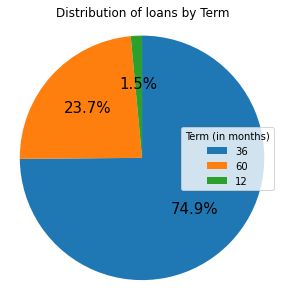

In [35]:
# Print the proportion below the bars 
plt.figure(figsize=[10, 5])

sorted_term = pd.DataFrame(sub_loan_clean['Term'].value_counts().reset_index())
labels = sorted_term['index']
textprops = {"fontsize":15}

plt.pie(data = sorted_term, x = 'Term', labels = None, startangle = 90,
        counterclock = False, autopct='%.1f%%', textprops = textprops)
plt.axis('square')
plt.title('Distribution of loans by Term')
plt.legend(labels, title = 'Term (in months)',loc=5);

#### `Observations`
- The vast majority of lones (around 75% of records) have a term of 36 months followed by loans with 60 months term (around 24%) and 12 months term (1.5%).

### Borrower APR
#### `Question` 
-  How is the `Borrower APR` distributed?

In [36]:
sub_loan_clean.BorrowerAPR.describe()

count    95572.000000
mean         0.217870
std          0.080352
min          0.006530
25%          0.155380
50%          0.207850
75%          0.281290
max          0.423950
Name: BorrowerAPR, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `Borrower APR` numeric variable.

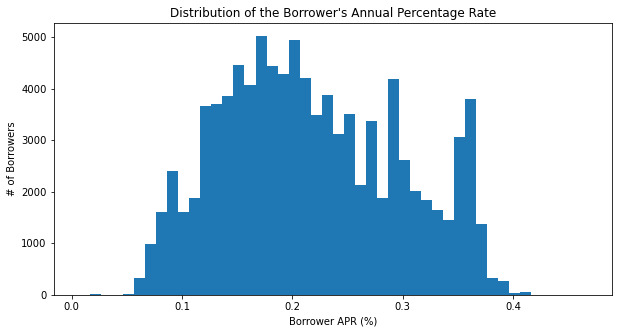

In [37]:
# Plot the distribution of Borrower APR variable 
rate_bins = np.arange(sub_loan_clean.BorrowerAPR.min(), sub_loan_clean.BorrowerAPR.max()+0.05, 0.01)

plt.figure(figsize = [10, 5])

plt.hist(data=sub_loan_clean, x='BorrowerAPR', bins=rate_bins)
plt.xlabel('Borrower APR (%)');
plt.ylabel('# of Borrowers')
plt.title("Distribution of the Borrower's Annual Percentage Rate");

#### `Observations`
- The distribution looks multimodal with small peaks around the interval of 0.1 and a bigger ones around the interval of 0.2. Afterward, it goes on a downward trend with a peaks at 0.3 and at 0.37. Only very few loans have APR greater than 0.43.

### ProsperRating
#### `Question` 
- How the ProsperRating is distributed amoung borrowers?

In [38]:
# View the categories of the ProsperRating variable
sub_loan_clean.ProsperRating.value_counts()

C     20656
B     17506
D     16327
A     15860
E     10150
AA     7596
HR     7477
Name: ProsperRating, dtype: int64

#### `Visualization` 
- We will use a bar chart with sequential color scheme to plot the `ProsperRating` categorical variable

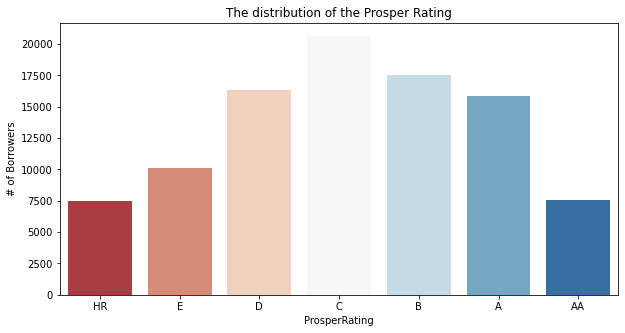

In [39]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = sub_loan_clean, x = 'ProsperRating', color = base_color, palette = "RdBu")
plt.ylabel('# of Borrowers')
plt.title('The distribution of the Prosper Rating');

#### `Observations`
- The ratings of most of the borrowers are among D to A, with the most common rating belonging to the **`C`** category. Listings with very high prosper ratings (**`AA`**) are the least common.

### Occupation
#### `Question` 
- How the borrowers are distributed by Occupation categories?

In [40]:
# View the categories of the ProsperRating variable
sub_loan_clean.Occupation.value_counts()

Other                                 23531
Professional                          12218
Computer Programmer                    3949
Executive                              3825
Teacher                                3444
Administrative Assistant               3361
Analyst                                3353
Accountant/CPA                         2918
Clerical                               2764
Sales - Commission                     2731
Skilled Labor                          2457
Nurse (RN)                             2384
Retail Management                      2338
Sales - Retail                         2253
Police Officer/Correction Officer      1506
Truck Driver                           1449
Laborer                                1428
Civil Service                          1386
Construction                           1369
Engineer - Mechanical                  1303
Military Enlisted                      1142
Food Service Management                1110
Engineer - Electrical           

#### `Visualization` 
- We will use a bar chart to plot the `Occupation` categorical variable. As there are lot of categories, we will limit our analysis by the top 15 categories. 

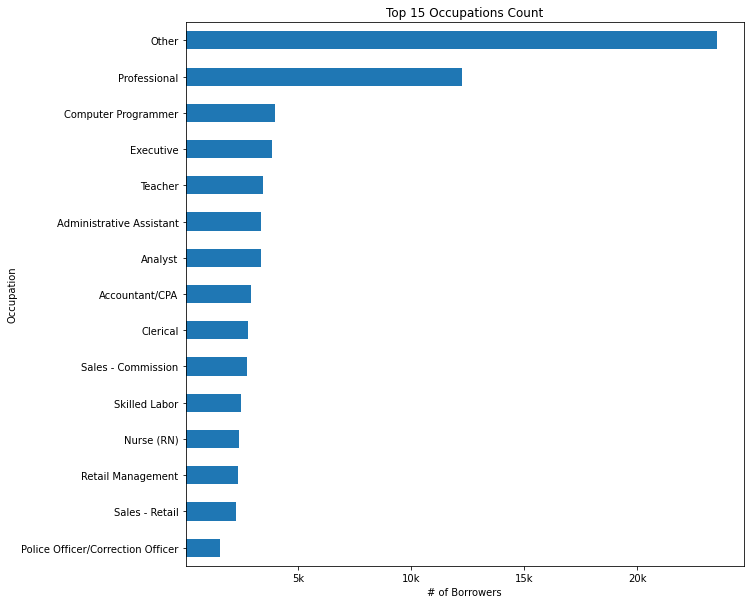

In [41]:
# see the categories of occupation
plt.figure(figsize=[10, 10])

sub_loan_clean.Occupation.value_counts()[14::-1].plot(kind='barh')
plt.title('Top 15 Occupations Count')
x_ticks = [5000, 10000, 15000, 20000]
x_ticks_names = ['5k','10k', '15k', '20k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlabel('# of Borrowers')
plt.ylabel('Occupation');

#### `Observations`
- Most borrowers indicated their occupations as "others" or "professional", so we don't have a clear view of what kind of occupation they have. The rest of the occupations do not show a big increase compared to others. Based on this we decided to drop this variable unless we have clear information. 

In [42]:
# Drop out the Occupation categorical variable from the dataset
sub_loan_clean = sub_loan_clean.drop(['Occupation'], axis=1)

#Check the results
sub_loan_clean.columns

Index(['LoanStatus', 'Term', 'BorrowerAPR', 'EmploymentStatus', 'IncomeRange',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio',
       'LoanOriginalAmount', 'ListingCategory', 'LoanNumber', 'ListingKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'Recommendations',
       'ProsperRating'],
      dtype='object')

### EmploymentStatusDuration
#### `Question` 
-  How is the `EmploymentStatusDuration` distributed?

In [43]:
sub_loan_clean.EmploymentStatusDuration.describe()

count    95572.000000
mean        97.151687
std         93.458919
min          0.000000
25%         27.000000
50%         69.000000
75%        139.000000
max        755.000000
Name: EmploymentStatusDuration, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `EmploymentStatusDuration` numeric variable.

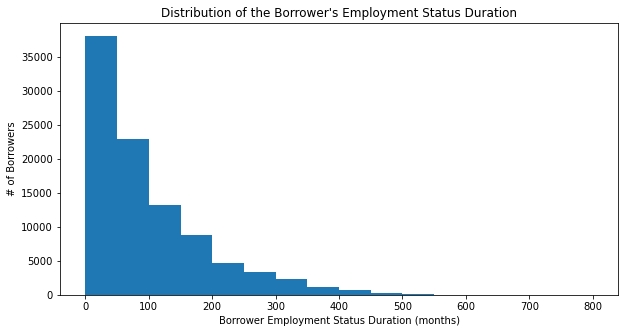

In [44]:
# Plot the distribution of the DebtToIncomeRatio 
rate_bins = np.arange(sub_loan_clean.EmploymentStatusDuration.min(), sub_loan_clean.EmploymentStatusDuration.max()+50, 50)

plt.figure(figsize = [10, 5])

plt.hist(data=sub_loan_clean, x='EmploymentStatusDuration', bins=rate_bins)
plt.xlabel('Borrower Employment Status Duration (months)');
plt.ylabel('# of Borrowers')
plt.title("Distribution of the Borrower's Employment Status Duration");

#### `Observations`
- The distribution of Employment Status Duration is right skewed.
- Most borrowers who apply for a loan have an Employment duration around 4 years.

### IsBorrowerHomeowner
#### `Question` 
- How is the `IsBorrowerHomeowner` variable distributed?

In [45]:
# View the categories of the IsBorrowerHomeowner variable
sub_loan_clean.IsBorrowerHomeowner.value_counts()

True     50524
False    45048
Name: IsBorrowerHomeowner, dtype: int64

#### `Visualization` 
- We will use a pie chart to see the proportions of each category of the `IsBorrowerHomeowner` variable as we have only two categories.

In [46]:
# Set dtype of 'LoanStatus' to category
term_order = sub_loan_clean['IsBorrowerHomeowner'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
sub_loan_clean['IsBorrowerHomeowner'] = sub_loan_clean['IsBorrowerHomeowner'].astype(ordered_var)

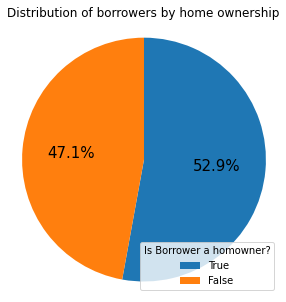

In [47]:
# Print the proportion below the bars 
plt.figure(figsize=[10, 5])

sorted_term = pd.DataFrame(sub_loan_clean['IsBorrowerHomeowner'].value_counts().reset_index())
labels = sorted_term['index']
textprops = {"fontsize":15}

plt.pie(data = sorted_term, x = 'IsBorrowerHomeowner', labels = None, startangle = 90,
        counterclock = False, autopct='%.1f%%', textprops = textprops)
plt.axis('square')
plt.title('Distribution of borrowers by home ownership')
plt.legend(labels, title = 'Is Borrower a homowner?',loc=4);

#### `Observations`
- Just over half of borrowers (around 53%) are homeowners.

### DebtToIncomeRatio
#### `Question` 
-  How is the `DebtToIncomeRatio` distributed?

In [48]:
sub_loan_clean.DebtToIncomeRatio.describe()

count    95572.000000
mean         0.274075
std          0.514641
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `DebtToIncomeRatio` numeric variable.

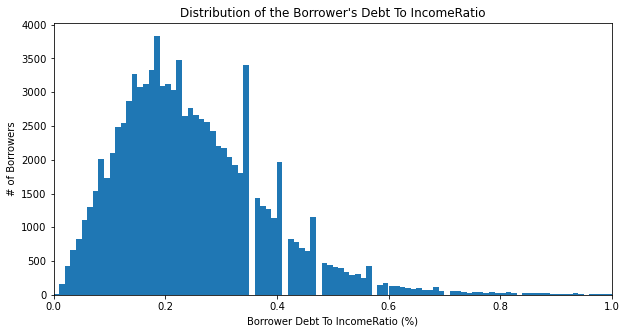

In [49]:
# Plot the distribution of the DebtToIncomeRatio 
rate_bins = np.arange(sub_loan_clean.DebtToIncomeRatio.min(), sub_loan_clean.DebtToIncomeRatio.max()+0.01, 0.01)

plt.figure(figsize = [10, 5])

plt.hist(data=sub_loan_clean, x='DebtToIncomeRatio', bins=rate_bins)
plt.xlabel('Borrower Debt To IncomeRatio (%)');
plt.ylabel('# of Borrowers')
plt.title("Distribution of the Borrower's Debt To IncomeRatio")
plt.xlim(0,1);

#### `Observations`
- The distribution of Debt-to-Income ratio is right skewed.
- Most borrowers who apply for a loan have a debt to income ratio around 20%. 
- There are some drops in counts as the ratio approaches 0.4 and 0.6.

### LoanOriginalAmount
#### `Question` 
-  How is the `LoanOriginalAmount` distributed?

In [50]:
sub_loan_clean.LoanOriginalAmount.describe()

count    95572.000000
mean      8693.514084
std       6363.124287
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `DebtToIncomeRatio` numeric variable.

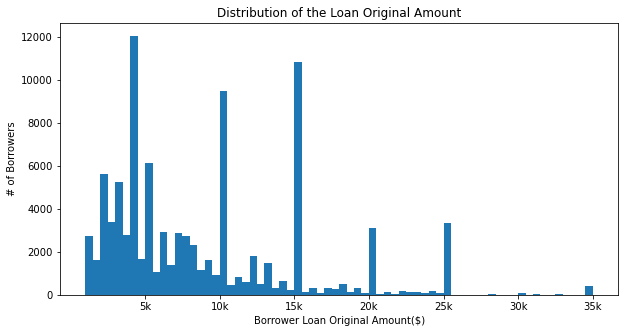

In [51]:
# Plot the distribution of the LoanOriginalAmount 
rate_bins = np.arange(sub_loan_clean.LoanOriginalAmount.min(), sub_loan_clean.LoanOriginalAmount.max()+500, 500)

plt.figure(figsize = [10, 5])

plt.hist(data=sub_loan_clean, x='LoanOriginalAmount', bins=rate_bins)
plt.xlabel('Borrower Loan Original Amount($)');
plt.ylabel('# of Borrowers')
x_ticks = [5000, 10000, 15000, 20000, 25000, 30000, 35000]
x_ticks_names = ['5k','10k', '15k', '20k', '25k', '30k','35k']
plt.xticks(x_ticks, x_ticks_names)
plt.title("Distribution of the Loan Original Amount");

It seems that we have outliers - loans greater than 30K. We will use boxplot to doublecheck

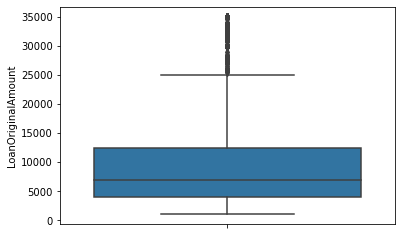

In [52]:
sb.boxplot(data=sub_loan_clean, y='LoanOriginalAmount')
plt.xticks(rotation=15);

#### `Observations`
- The distribution of LoanOriginalAmount is right skewed.
- There are large spikes at 5k, 10k, 15k, 20k, and 25k. So, these loan sizes are the most common ones that people took out.
- This may also suggest that the majority of the loans do not exceed 15,000 US dollars.
- Outliers identified in terms of loans greater than 30K.

### ListingCategory
#### `Question` 
- How are the loans distributed by their purpose?

In [53]:
# View the categories of the ListingCategory variable
sub_loan_clean.ListingCategory.value_counts()

Debt Consolidation    52878
Other                  9380
Not Available          9022
Home Improvement       6865
Business               5160
Auto                   2342
Personal Loan          2271
Household Expenses     1759
Medical or Dental      1369
Large Purchases         783
Taxes                   780
Wedding Loans           721
Vacation                709
Student Use             600
Motorcycle              289
Engagement Ring         198
Baby & Adoption         188
Boat                     83
Cosmetic Procedure       82
RV                       49
Green Loans              44
Name: ListingCategory, dtype: int64

#### `Visualization` 
- We will use a bar chart to plot the `ListingCategory` categorical variable. 

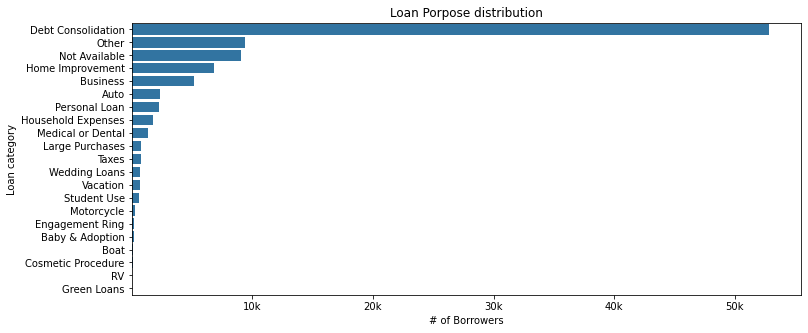

In [54]:
# Plot EmploymentStatus
plt.figure(figsize=[12, 5])
color_base = sb.color_palette()[0]
status_empl=sub_loan_clean.ListingCategory.value_counts().index
sb.countplot(data=sub_loan_clean, y='ListingCategory', order=status_empl, color=color_base)
x_ticks = [10000, 20000, 30000, 40000, 50000]
x_ticks_names = ['10k', '20k', '30k', '40k', '50k']
plt.xticks(x_ticks, x_ticks_names)
plt.title('Loan Porpose distribution')
plt.xlabel('# of Borrowers')
plt.ylabel('Loan category');

#### `Observations`
- Debt consolidation is the most popular type of Prosper's loans. Surprisingly, it appears that borrowers use loans to pay existing loans. The proportion of these individuals greatly exceeds those that seek loans for many expected reasons like Business, Home improvement, Auto etc. 
- `Other` and `Not available` categories also have visible share.

### Recommendations
#### `Question` 
-  How is the `Recommendations` distributed?

In [55]:
sub_loan_clean.Recommendations.describe()

count    95572.000000
mean         0.050245
std          0.316585
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Recommendations, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `Recommendations` numeric variable.

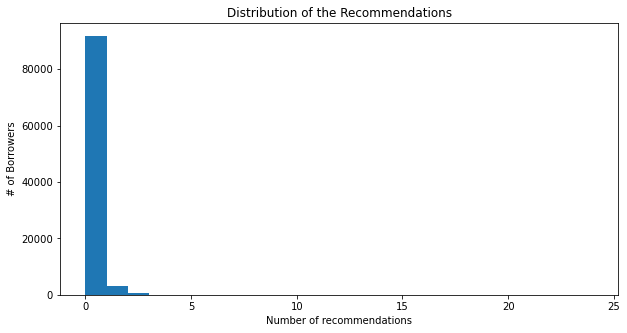

In [56]:
# Plot the initial distribution of the Recommendations 
rate_bins = np.arange(sub_loan_clean.Recommendations.min(), sub_loan_clean.Recommendations.max()+1, 1)

plt.figure(figsize = [10, 5])

plt.hist(data=sub_loan_clean, x='Recommendations', bins=rate_bins)
plt.xlabel('Number of recommendations');
plt.ylabel('# of Borrowers')
plt.title("Distribution of the Recommendations");

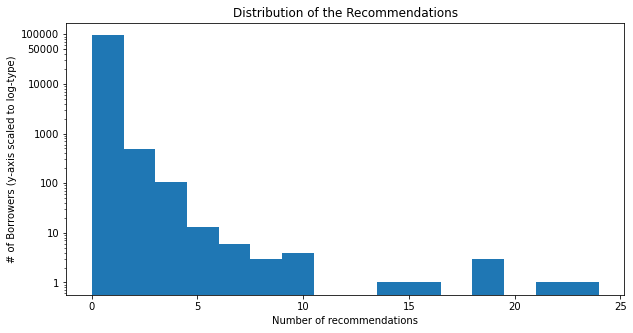

In [57]:
# Plot the rescaled distribution of the Recommendations 
rate_bins = np.arange(sub_loan_clean.Recommendations.min(), sub_loan_clean.Recommendations.max()+1.5, 1.5)

plt.figure(figsize = [10, 5])
plt.yscale('log')
yticks= [1, 10, 100, 1000, 10000, 50000, 100000]
plt.yticks(yticks, yticks);
plt.hist(data=sub_loan_clean, x='Recommendations', bins=rate_bins)
plt.xlabel('Number of recommendations');
plt.ylabel('# of Borrowers (y-axis scaled to log-type)')
plt.title("Distribution of the Recommendations");

#### `Observations`
- The recommendations distribution appears to be right skewed with most recommendations below 10. This distribution was not visible from the initial plot but after placing the count axis on a log scale it can be clearly seen.

### IncomeRange
#### `Question` 
- How the borrowers are distributed by income range?

In [58]:
# View the categories of the IncomeRange variable
sub_loan_clean.IncomeRange.value_counts(dropna=False)

$25,000-49,999    29042
$50,000-74,999    28716
$100,000+         15886
$75,000-99,999    15781
$1-24,999          6069
$0                   78
Name: IncomeRange, dtype: int64

#### `Visualization` 
- We will use a bar chart with sequential color scheme to plot the `IncomeRange` categorical variable. 

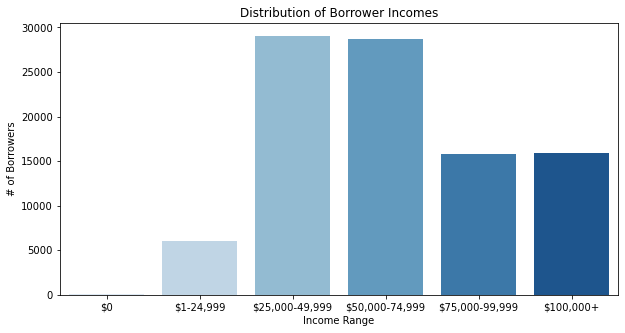

In [59]:
plt.figure(figsize = [10, 5])
sb.countplot(data = sub_loan_clean, x = 'IncomeRange', palette = "Blues")
plt.xlabel('Income Range')
plt.ylabel('# of Borrowers')
plt.title('Distribution of Borrower Incomes');

#### `Observations`
- The vast majority of the borrowers have income in the range 25000-75000$.

### LoanOriginationDate
#### `Question` 
- How the number of loans are distributed by years?

In [60]:
# Extract the year from LoanOriginDate variable
sub_loan_clean['Year'] = sub_loan_clean['LoanOriginationDate'].dt.year

#### `Visualization` 
- We will use a bar chart to plot the lising years of the loans

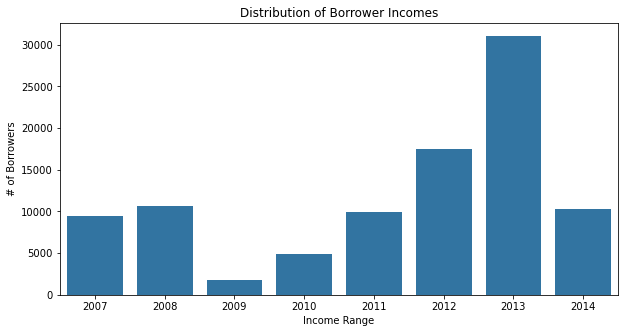

In [61]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
sb.countplot(data = sub_loan_clean, x = 'Year', color = base_color)
plt.xlabel('Income Range')
plt.ylabel('# of Borrowers')
plt.title('Distribution of Borrower Incomes');

In [62]:
sub_loan_clean.LoanOriginationDate.sort_values(ascending=False).head(1)

9459   2014-03-12
Name: LoanOriginationDate, dtype: datetime64[ns]

In [63]:
sub_loan_clean.LoanOriginationDate[sub_loan_clean.Year == 2009].sort_values(ascending=False).head(1)

66139   2009-12-31
Name: LoanOriginationDate, dtype: datetime64[ns]

In [64]:
sub_loan_clean.LoanOriginationDate[sub_loan_clean.Year == 2009].sort_values(ascending=False).tail(1)

92238   2009-05-06
Name: LoanOriginationDate, dtype: datetime64[ns]

#### `Observations`
- In general, the number of loans has an increasing dynamics. The years 2009 and 2014 are an exception. The decreases in those years may be due to the fact that data were not collected for all months of the year

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main variable that we interested in is `LoanStatus`. The vast majority of loans were marked as 'Current', followed by 'Completed' and 'Charged off'. The defult rate was not so high and it seems like most people pay their loans on time.  There were no unusual points noticed. There were a lot of 'Past Due' categories, so we merged them under one category to make the visual more perceptible.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most borrowers indicated their occupations as "others" or "professional", so we don't have a clear view of what kind of occupation they have. The rest of the occupations do not show a big increase compared to others. Based on this we decided to drop this variable unless we have clearer information.

> The distribution of LoanOriginalAmount is right skewed. There are large spikes at 5k, 10k, 15k, 20k, and 25k. So, these loan sizes are the most common ones that people took out. This may also suggest that the majority of the loans do not exceed 15,000 US dollars. Outliers identified in terms of loans greater than 30K.

> Debt consolidation is the most popular type of Prosper's loans. Surprisingly, it appears that borrowers use loans to pay existing loans. The proportion of these individuals greatly exceeds those that seek loans for many expected reasons like Business, Home improvement, Auto etc.

> The recommendations distribution appears to be right skewed with most recommendations below 10. This distribution was not visible from the initial plot but after placing the count axis on a log scale it can be clearly seen.

> In general, the number of loans has an increasing dynamics. The years 2009 and 2014 are an exception. The decreases in those years may be due to the fact that data were not collected for all months of the year

> ProsperRating (numeric), ListingCategory (numeric) and ProsperRating (Alpha) column names have been changed to facilitate the work.

> 871 duplicate records have been identified and drouped out from the dataset.

> LoanOriginationDate variable type have been changed to a datetime object.

> ListingCategory (numeric) variable type have be changed to pandas object to better reflect the reasons for the loan based on the information of the data dictionary.

> ProsperRating, IncomeRange and CreditGrade columns contained null values. This was becouse the first two columns reflect the information for loans originated after July 2009 and the lats one - reflects the information for loans originated before 2009. A new column was created merging those variables to reduce the number of missing observations.

> Not employed category of the IncomeRange variable have been replaced with '0' to reduce the categories and make the visual more perceptible. 

> Duplicated Recommendations coulmns have been identified and one of them was droped out from the dataframe.

## Bivariate Exploration

> In this section we will investigate relationships between pairs of variables in our data.

> As we are most interested in what features are important in predicting the LoanStatus in the dataset we will focus on specific categories of the LoanStatus variable. Specifically what features are important in predicting whether a loan will be defaulted, completed, or charged off? So we will subset our dataset to capture the above-mentioned categories

In [65]:
# Subset the dataframe
sub_loan_clean = sub_loan_clean.drop(sub_loan_clean[sub_loan_clean.LoanStatus.isin(["Current", "Past Due", "FinalPaymentInProgress","Cancelled"])].index)

In [66]:
# Set dtype of 'LoanStatus' to category
loanstatus_order = ["Defaulted", "Chargedoff", "Completed"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
sub_loan_clean['LoanStatus'] = sub_loan_clean['LoanStatus'].astype(ordered_var)

We will start exploration by investigating the relationships between the numeric variables of interest.

#### `Question` 
- Are there any correlated numeric variables?

#### `Visualization`

In [67]:
# Create lists of numeric and categorical variables
num_var = ['BorrowerAPR', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Recommendations']
cat_var = ['LoanStatus', 'Term', 'EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner', 'ListingCategory', 'ProsperRating']

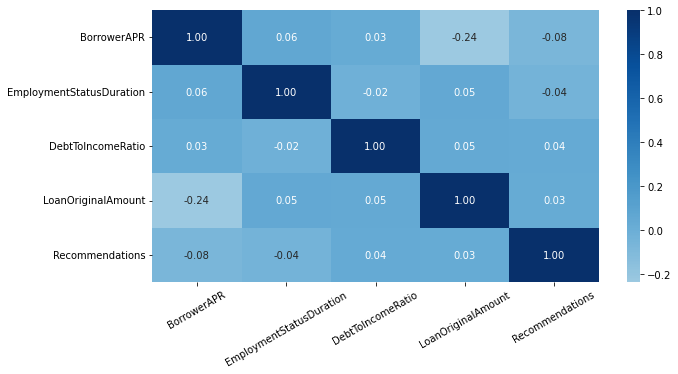

In [68]:
plt.figure(figsize = [10, 5])
sb.heatmap(sub_loan_clean[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'Blues', center = 0)
plt.xticks(rotation = 30);

#### `Observations`
The only more or less noticeable correlation (weak inverse) exists between BorrowerAPR and LoanOriginalAmount variables, which means that the interest rate on loans with a large amount is lower.

#### `Question` 
- What is the association between Loanstatus and the numerical variables: 'BorrowerAPR', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Recommendations'?

#### `Visualization`

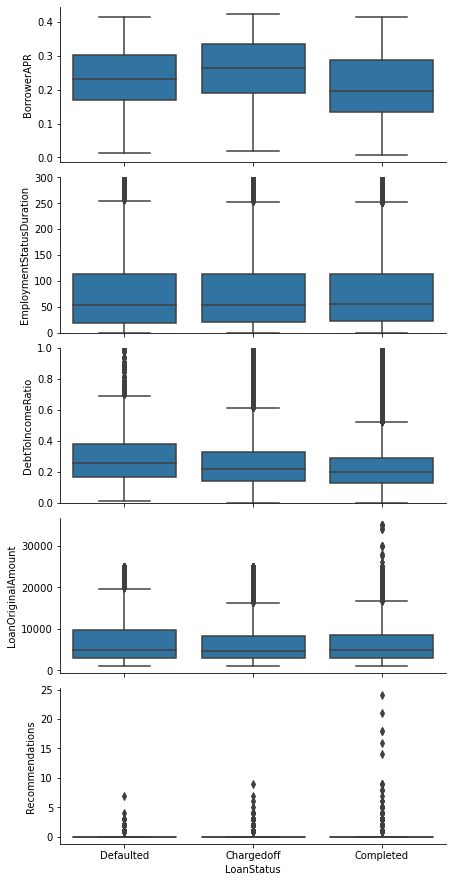

In [69]:
colors = sb.color_palette('Paired')
fig = sb.PairGrid(data=sub_loan_clean, y_vars=num_var, x_vars='LoanStatus', aspect=2.5)
fig.map(sb.boxplot, color=colors[1]);

# Limit the y axis of DebtToIncome ratio to 0 - 1
fig.axes[2][0].set_ylim(0, 1)

# Limit the y axis of EmploymentStatusDuration to 0 - 300
fig.axes[1][0].set_ylim(0, 300);

We will use another additional plots to explore the relationship between Recommendations and Loan Status.
#### `Visualization` 

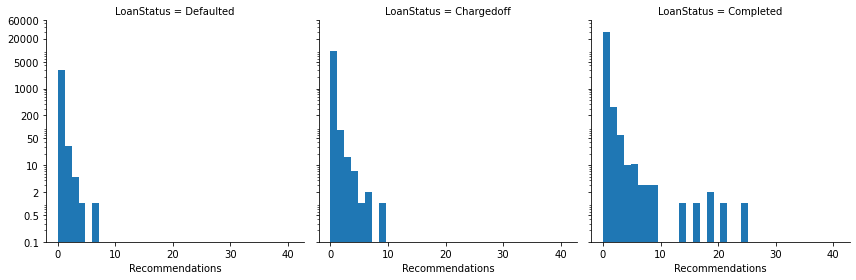

In [70]:
order=sub_loan_clean.LoanStatus.unique()
bins = np.arange(0, 40+1.2, 1.2)
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
g=sb.FacetGrid(data=sub_loan_clean, col='LoanStatus', height=4)
g.map(plt.hist, 'Recommendations', bins=bins)
g.set(yscale='log', yticks=yticks, yticklabels=yticks);

#### `Observations`
- From the charts above we can see that the Borrower APR is higher for the Charged Off, followed by Defaulted, and Completed Loans and seems for the loans with the higher rate the chance to default is higher.
- A higher debt-income ratio also leads to default.
- The histogram plot shows that most of the people granted loans have less than ten recommendations count for completed, defaulted and chargedoff status. At the same time we can aslo see that there are more completed loans with recommendations more than 10 than there are for defaulted and charged off.

Let's continue to explore by plotting the LoanStatus along with other categorical variables.

#### `Question` 
- What is the association between Loanstatus and Term?

#### `Visualization` 

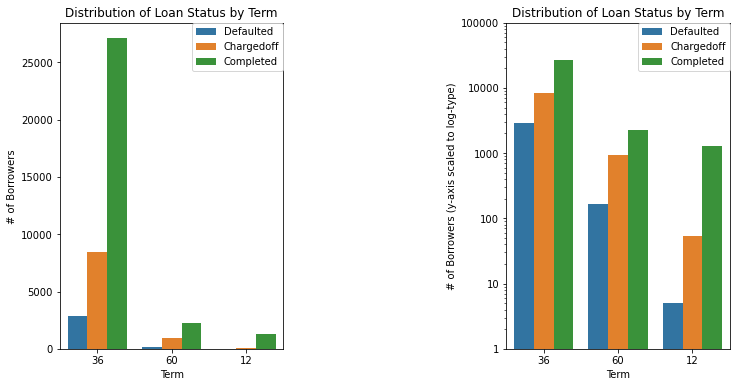

In [71]:
# Create clustered bar chart 
plt.figure(figsize=(12, 6)) 
# subplot 1
plt.subplot(1,2,1)
ax = sb.countplot(data = sub_loan_clean, x = 'Term', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.title('Distribution of Loan Status by Term')
plt.ylabel('# of Borrowers')
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('Term');

# subplot 2 - use logaritmic scaling to zoom the output
plt.subplot(1,2,2)
ax = sb.countplot(data = sub_loan_clean, x = 'Term', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.yscale('log')
plt.title('Distribution of Loan Status by Term')
plt.ylabel('# of Borrowers (y-axis scaled to log-type)')
yticks= [1, 10, 100, 1000, 10000, 100000]
plt.yticks(yticks, yticks);
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('Term');

plt.subplots_adjust(wspace=1)

#### `Observations`
- Loans with a maturity of 36 months were the most defaulted.

#### `Question` 
- What is the association between Loanstatus and EmploymentStatus?

#### `Visualization` 

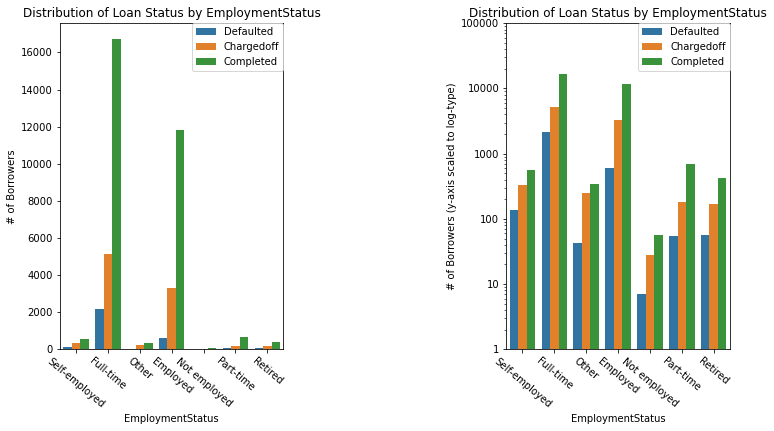

In [72]:
# Create clustered bar chart 
plt.figure(figsize=(12, 6)) 
# subplot 1
plt.subplot(1,2,1)
ax = sb.countplot(data = sub_loan_clean, x = 'EmploymentStatus', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.title('Distribution of Loan Status by EmploymentStatus')
plt.ylabel('# of Borrowers')
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('EmploymentStatus')
plt.xticks(rotation = 320);

# subplot 2 - use logaritmic scaling to zoom the output
plt.subplot(1,2,2)
ax = sb.countplot(data = sub_loan_clean, x = 'EmploymentStatus', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.yscale('log')
plt.title('Distribution of Loan Status by EmploymentStatus')
plt.ylabel('# of Borrowers (y-axis scaled to log-type)')
yticks= [1, 10, 100, 1000, 10000, 100000]
plt.yticks(yticks, yticks);
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('EmploymentStatus')
plt.xticks(rotation = 320);

plt.subplots_adjust(wspace=1)

#### `Observations`
- Not employed is the second highest category with the number of defaulted loans.

#### `Question` 
- What is the association between Loanstatus and IncomeRange?

#### `Visualization` 

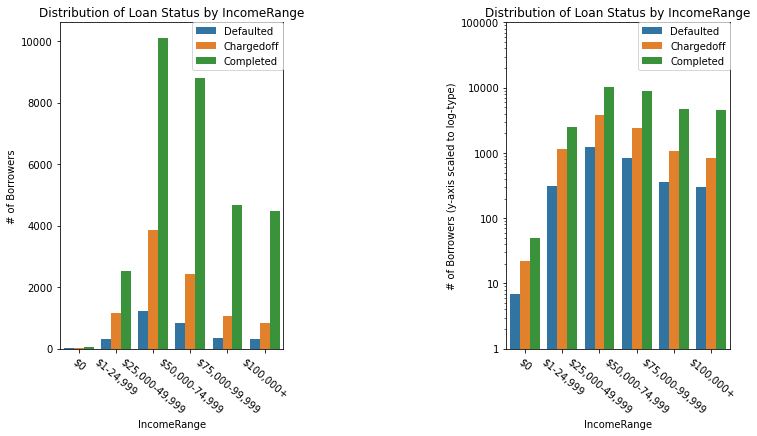

In [73]:
# Create clustered bar chart 
plt.figure(figsize=(12, 6)) 
# subplot 1
plt.subplot(1,2,1)
ax = sb.countplot(data = sub_loan_clean, x = 'IncomeRange', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.title('Distribution of Loan Status by IncomeRange')
plt.ylabel('# of Borrowers')
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('IncomeRange')
plt.xticks(rotation = 320);

# subplot 2 - use logaritmic scaling to zoom the output
plt.subplot(1,2,2)
ax = sb.countplot(data = sub_loan_clean, x = 'IncomeRange', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.yscale('log')
plt.title('Distribution of Loan Status by IncomeRange')
plt.ylabel('# of Borrowers (y-axis scaled to log-type)')
yticks= [1, 10, 100, 1000, 10000, 100000]
plt.yticks(yticks, yticks);
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('IncomeRange')
plt.xticks(rotation = 320);

plt.subplots_adjust(wspace=1)

#### `Observations`
- Parallel to the growth of incomes, the number of defaulted loans first increases and then decreases. The most defaults are found in the 50-75 thousand income group.

#### `Question` 
- What is the association between Loanstatus and IsBorrowerHomeowner?

#### `Visualization` 

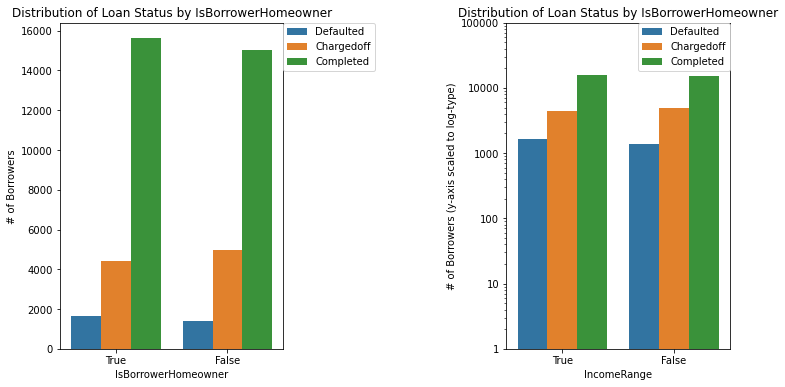

In [74]:
# Create clustered bar chart 
plt.figure(figsize=(12, 6)) 
# subplot 1
plt.subplot(1,2,1)
ax = sb.countplot(data = sub_loan_clean, x = 'IsBorrowerHomeowner', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.title('Distribution of Loan Status by IsBorrowerHomeowner')
plt.ylabel('# of Borrowers')
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('IsBorrowerHomeowner')
#plt.xticks(rotation = 320);

# subplot 2 - use logaritmic scaling to zoom the output
plt.subplot(1,2,2)
ax = sb.countplot(data = sub_loan_clean, x = 'IsBorrowerHomeowner', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.yscale('log')
plt.title('Distribution of Loan Status by IsBorrowerHomeowner')
plt.ylabel('# of Borrowers (y-axis scaled to log-type)')
yticks= [1, 10, 100, 1000, 10000, 100000]
plt.yticks(yticks, yticks);
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('IncomeRange')
#plt.xticks(rotation = 320);

plt.subplots_adjust(wspace=1)

#### `Observations`
- It seems that both homeowners and not owners have the same exposure to default.

#### `Question` 
- What is the association between Loanstatus and ProsperRating?

#### `Visualization` 

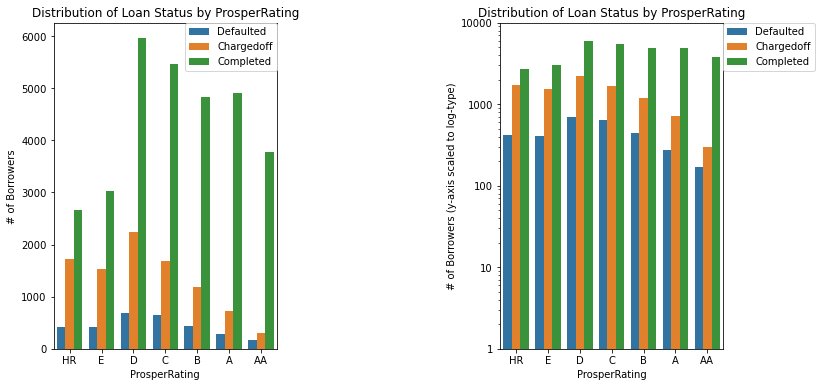

In [75]:
# Create clustered bar chart 
plt.figure(figsize=(12, 6)) 
# subplot 1
plt.subplot(1,2,1)
ax = sb.countplot(data = sub_loan_clean, x = 'ProsperRating', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.title('Distribution of Loan Status by ProsperRating')
plt.ylabel('# of Borrowers')
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('ProsperRating')
#plt.xticks(rotation = 320);

# subplot 2 - use logaritmic scaling to zoom the output
plt.subplot(1,2,2)
ax = sb.countplot(data = sub_loan_clean, x = 'ProsperRating', hue = 'LoanStatus')
ax.legend(title = 'Loan Status')
plt.yscale('log')
plt.title('Distribution of Loan Status by ProsperRating')
plt.ylabel('# of Borrowers (y-axis scaled to log-type)')
yticks= [1, 10, 100, 1000, 10000]
plt.yticks(yticks, yticks);
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('ProsperRating')
#plt.xticks(rotation = 320);

plt.subplots_adjust(wspace=1)

#### `Observations`
- As expected, higher rated borrowers have a lower default rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower APR is higher for the Charged Off, followed by Defaulted, and Completed Loans and seems for the loans with the higher rate the chance to default is higher. A higher debt-income ratio also leads to default.

> Most of the people granted loans have less than ten recommendations count for completed, defaulted and chargedoff status. At the same time there are more completed loans with recommendations more than 10 than there are for defaulted and charged off loans.

> Loans with a maturity of 36 months were the most defaulted.

> Not employed is the second highest category with the number of defaulted loans.

> Parallel to the growth of incomes, the number of defaulted loans first increases and then decreases. The most defaults are found in the 50-75 thousand income group.

> Both homeowners and not owners have the same exposure to default.

> As expected, higher rated borrowers have a lower default rate.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The only more or less noticeable correlation (weak inverse) exists between BorrowerAPR and LoanOriginalAmount variables, which means that the interest rate on loans with a large amount is lower.

## Multivariate Exploration

> In this section, we will investigate further the relationship between loan status and other explanatory variables - both categorical and numerical by creating plots of three or more variables.

#### `Question` 
- What is the association between BorrowerAPR, ProsperRating and LoanStatus?

#### `Visualization` 

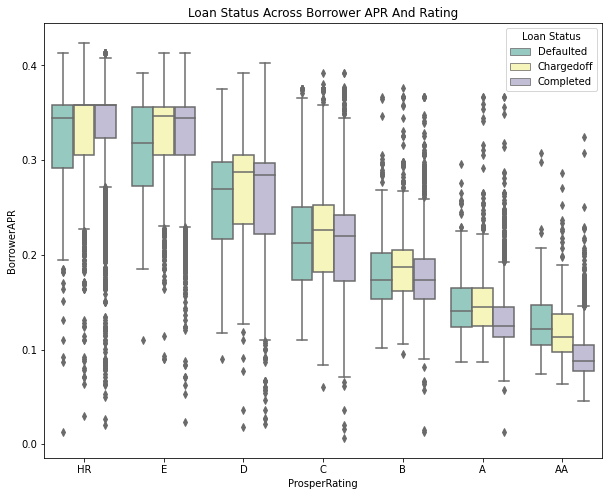

In [76]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperRating', y='BorrowerAPR', hue='LoanStatus',
                 data=sub_loan_clean, palette="Set3")
plt.title('Loan Status Across Borrower APR And Rating')
plt.legend(title = 'Loan Status');

#### `Observations`
- Borrowers with high ratings receive loans at lower interest rates and also have a lower risk of default.
- Among defaulted AA borrowers, the default rate was higher compared to ChargedOff and Completed categories.

#### `Question` 
- What is the association between LoanOriginalAmount, ProsperRating and LoanStatus?

#### `Visualization` 

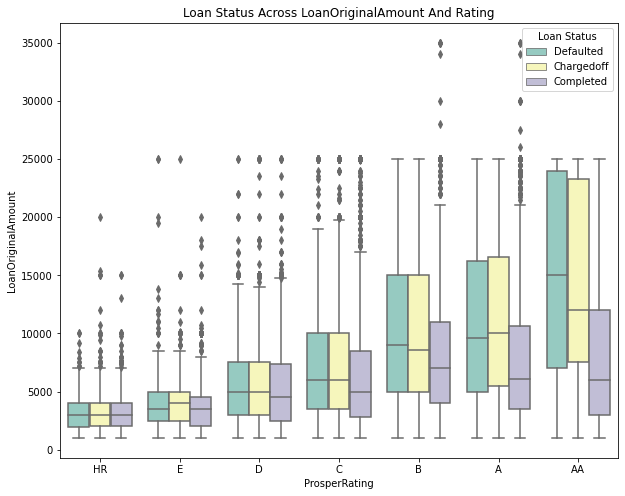

In [77]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperRating', y='LoanOriginalAmount', hue='LoanStatus',
                 data=sub_loan_clean, palette="Set3")
plt.title('Loan Status Across LoanOriginalAmount And Rating')
plt.legend(title = 'Loan Status');
#ax.set_ylim(0, 2);

#### `Observations`
- Borrowers with high ratings receive greater amount of loans for which the risk of default is higher as well.

#### `Question` 
- What is the association between LoanOriginalAmount, BorrowerAPR and LoanStatus?

#### `Visualization` 

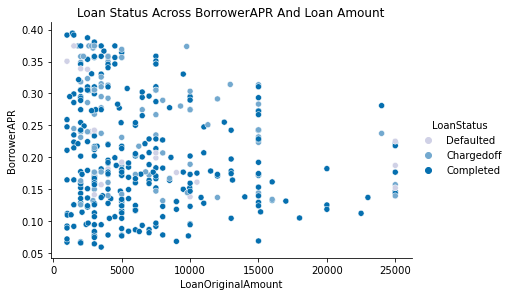

In [78]:
# Visualize interactions with a seaborn relplot
sb.relplot(data=sub_loan_clean.sample(400, random_state=1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue='LoanStatus', palette='PuBu', height=4, aspect=1.5)
plt.title('Loan Status Across BorrowerAPR And Loan Amount');

#### `Observations`
- The relationship between the three variables is the following - borrowers who defaulted take small loans at higher percentage rates.

#### `Question` 
- What is the association between Employment Status, Listing Category and loan status?

#### `Visualization` 

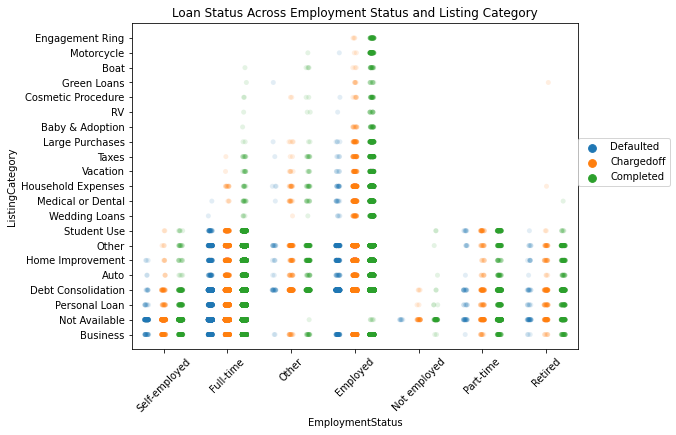

In [79]:
fig, ax = plt.subplots(nrows=1, figsize=(8, 6))
sb.stripplot(data=sub_loan_clean, y='ListingCategory', x='EmploymentStatus',
             hue='LoanStatus', jitter=True, ax=ax, dodge= 0.7, alpha=1/8)
plt.xticks(rotation=45)
plt.legend(loc=(1,0.5))
plt.title('Loan Status Across Employment Status and Listing Category');

#### `Observations`
- We can see that those who are fully employed seem to borrow for a wide range of reasons with some having equal chances of being charged off or defaulted as they have of being completed.
- Those who are not employed or part-time employed seem to mainly borrow for a study, dept consolidation reasons again having equal chances of being charged off or defaulted as they have of being completed.

#### `Question` 
- What is the association between Employment Status, Recommendations and loan status?

#### `Visualization` 

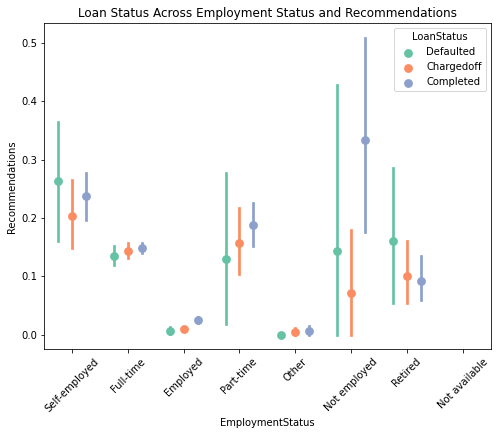

In [80]:
y_order = ['Self-employed', 'Full-time', 'Employed', 'Part-time', 'Other', 'Not employed', 'Retired', 'Not available']
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='Recommendations', data=sub_loan_clean, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=y_order, palette='Set2')
plt.xticks(rotation=45)
plt.title('Loan Status Across Employment Status and Recommendations');

#### `Observations`
- Those in the fulltime employment category have more recommendations than those in other categories with them also completing their loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrowers with high ratings receive loans at lower interest rates and also have a lower risk of default. Borrowers with high ratings receive greater amount of loans for which the risk of default is higher as well.

> Borrowers who defaulted take small loans at higher percentage rates.

> We can see that those who are fully employed seem to borrow for a wide range of reasons with some having equal chances of being charged off or defaulted as they have of being completed. Those who are not employed or part-time employed seem to mainly borrow for a study, dept consolidation reasons again having equal chances of being charged off or defaulted as they have of being completed.

>Those in the fulltime employment category have more recommendations than those in other categories with them also completing their loans.

### Were there any interesting or surprising interactions between features?

> Among defaulted AA borrowers, the default rate was higher compared to ChargedOff and Completed categories. This may be due to the fact that borrowers with high ratings take on larger amounts of loans, for which the risk of default is higher.  

## Conclusions
> In this analysis, we tried to explore the factors that influence the main variable of interest - the `LoanStatus`. 

> At the end of the exploration, we came to the conclusion that those who satisfy the following conditions are more likely to complete their loans.
- Employed
- Dept to Income ratio <= 0.2
- Prosper Rating between D and A
- Recommedations >=10
- Loan amount from 5K to 15K